In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [5]:
burn_lc = pd.read_csv('../results/22jul2018/trainset_3_fissact_burnup_learning_curve.csv')
enri_lc = pd.read_csv('../results/22jul2018/trainset_3_fissact_enrichment_learning_curve.csv')
cool_lc = pd.read_csv('../results/22jul2018/trainset_3_fissact_cooling_learning_curve.csv')
#rxtr_lc = pd.read_csv('../results/22jul2018/trainset_3_fissact_reactor_learning_curve.csv')

#burn_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_burnup_learning_curve.csv')
#enri_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_enrichment_learning_curve.csv')
#cool_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_cooling_learning_curve.csv')
#rxtr_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_reactor_learning_curve.csv')
rxtr_lc = pd.read_csv('../trainset3_fissact_m60_reactor_learning_curve.csv')

In [6]:
burn_lc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_lc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_lc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_lc.loc[:, 'Parameter'] = 'Reactor Type'

In [7]:
rxtr_lc.sample(10)

,TrainSizeFrac,AbsTrainSize,TrainScore,TrainStd,CV-Score,CV-Std,Algorithm,Parameter
33,0.40,4760,0.989496,0.000901,0.989312,0.001694,svr,Reactor Type
5,0.55,6545,0.997555,0.000572,0.952947,0.004902,knn,Reactor Type
18,0.40,4760,0.998193,0.000557,0.967467,0.004999,dtree,Reactor Type
41,0.85,10115,0.991122,0.000870,0.991127,0.002196,svr,Reactor Type
2,0.30,3570,0.997591,0.001072,0.936411,0.003867,knn,Reactor Type
38,0.70,8330,0.990900,0.000843,0.990791,0.002336,svr,Reactor Type
22,0.65,7735,0.997983,0.000467,0.978491,0.002511,dtree,Reactor Type
20,0.55,6545,0.997922,0.000560,0.976407,0.005517,dtree,Reactor Type
16,0.20,2380,0.997899,0.000703,0.945284,0.004710,dtree,Reactor Type
14,1.00,11901,0.997916,0.000134,0.967399,0.002077,knn,Reactor Type


# Learning Curves By Prediction Type

In [25]:
def plot_learning_curve(df, title, fig, ax):
    
    train_sizes = df['AbsTrainSize']
    train_frac = df['TrainSizeFrac']
    train_scores_mean = df['TrainScore']
    train_scores_std = df['TrainStd']
    test_scores_mean = df['CV-Score']
    test_scores_std = df['CV-Std']
    
    #ax.set_title(title, fontsize=20)
    plt.title(title, y=1.2, fontsize=20)

    ax.set_xlabel('Training Set Size', fontsize=14)
    #ax.set_xlim(-1, 12000)
    ax.tick_params(labelsize=14)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color = med[0], 
                     alpha=0.2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color = med[1], 
                     alpha=0.2)
    plt.plot(train_sizes, train_scores_mean, 'o-', color=med[0],
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=med[1],
             label="Cross-validation score")
    
    # Double x axis
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticklabels(train_frac)
    ax2.set_xlabel('Fraction of Training Set')
    
    return fig

In [26]:
fig.clf()
sns.set(style="ticks", font_scale=1)

## Reactor Type

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


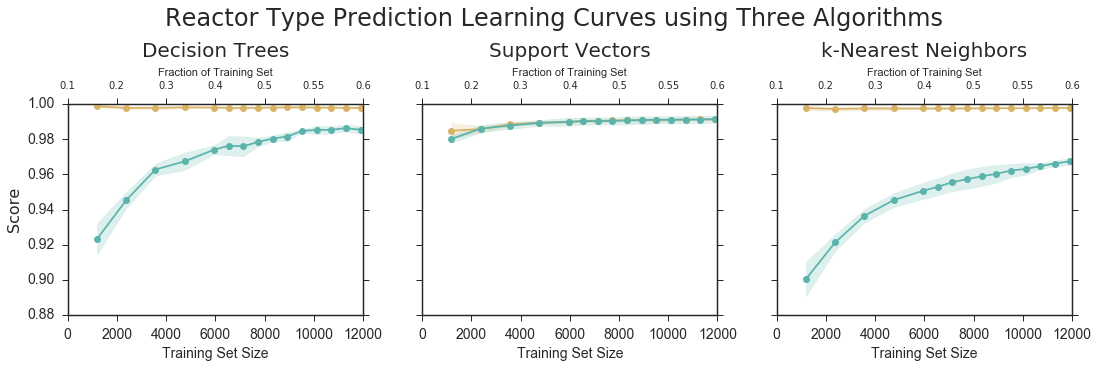

In [27]:
fig, (ax_knn, ax_dtree, ax_svr) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 5))
knn = ['knn', 'k-Nearest Neighbors', ax_knn]
dtree = ['dtree', 'Decision Trees', ax_dtree]
svr = ['svr', 'Support Vectors', ax_svr]

ax_knn.set_ylabel('Score', fontsize=16)
#ax.set_ylim(0.7, 1.01)

for alg, alg_title, ax in [knn, dtree, svr]:
    lc = rxtr_lc.loc[(rxtr_lc['Algorithm']==alg)]
    title = alg_title
    plot_learning_curve(lc, title, fig, ax)

fig.suptitle('Reactor Type Prediction Learning Curves using Three Algorithms', fontsize=24)
plt.subplots_adjust(top=.71)
plt.legend(loc=(1.1, 0.5))
#for l in leg.legendHandles:
#    l.set_alpha(1)
fig.show()
fig.savefig('../results/4oct2018/graphs/rxtr_learning.png', bbox_inches='tight', transparent=True)